In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib
from matplotlib import rc
from pylab import *
import seaborn as sns
from scipy.optimize import fsolve
from matplotlib import colors as c
from numpy import linalg as LA
from scipy.integrate import odeint


matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'

start = time.time()

N = 500; n_init = 2;
AA = np.zeros((N,N)); GG = np.zeros((N,N)); 
U = np.zeros((n_init,N,N)); V = np.zeros((n_init,N,N));

osc1 = np.zeros((n_init,N,N)); osc2 = np.zeros((n_init,N,N)); 
bis1 = np.zeros((n_init,N,N)); bis2 = np.zeros((n_init,N,N));
bis4 = np.zeros((n_init,N,N)); bis5 = np.zeros((n_init,N,N));
tur1 = np.zeros((n_init,N,N)); tur2 = np.zeros((n_init,N,N)); 

F1 = np.zeros((n_init,N,N));
F2 = np.zeros((n_init,N,N));

w1r = np.zeros((n_init,N,N)); w2r = np.zeros((n_init,N,N));
w1i = np.zeros((n_init,N,N)); w2i = np.zeros((n_init,N,N));

a0 = 0.4; g0 = 0.1; a = 2; g = 0.78; kc = 1; ku = 1.2; kv = 2;
Dv = 4; nu = 4; nv = 4; du = 1; dv = 1;


tfinal = 1750; tsteps = 5000
T = np.linspace(0,tfinal,tsteps)
Tinv = np.linspace(-tfinal,0,tsteps)

nx = 25; ny = 20;
wr = 2*nx/3; ws = 1*ny/3;

j = -1;

amax = 1.25; gmax = 18;

for a0 in np.linspace(0,amax,N):

    i = -1;
    j = j + 1
    print(j)

    for g in np.linspace(0,gmax,N):

        i = i + 1
        l = -1

        def func(x, t = 0):
            return array([a0 + a*((x[0])**nu)/(ku**nu + (x[0])**nu) - kc*x[0]*(g0 + g*((x[0])**nv)/(kv**nv + (x[0])**nv))/dv - du*x[0]])

        AA[i,j] = a0; GG[i,j] = g
        
        for init in np.linspace(2,2,n_init):

            l = l + 1

            sols_time = odeint(func,[init], T)
            U[l,i,j] = sols_time[tsteps-1][0]; 

            #sols_fp = fsolve(func,[init])
            #M[l,i,j] = sols_fp[0]; 

            V[l,i,j] = (g0 + g*(U[l,i,j]**nv)/(kv**nv + U[l,i,j]**nv))/dv
            
            F1[l,i,j] = nu*a*((ku**nu)*U[l,i,j]**(nu-1))/((ku**nu + U[l,i,j]**nu)**2)
            F2[l,i,j] = nv*g*((kv**nv)*U[l,i,j]**(nv-1))/((kv**nv + U[l,i,j]**nv)**2)
            
            J11r = F1[l,i,j] - kc*V[l,i,j] - du
            J12r = F2[l,i,j]

            J21r = -kc*U[l,i,j]
            Omega = np.cos(2*pi*(wr/nx - ws/ny)) + np.cos(2*pi*wr/nx) + np.cos(2*pi*ws/ny) 
            J22r = - du - (2/3)*Dv*(6 - 2*(-1.5)) #### -1.5 = -3/2 is the minum value of Omega, when all cosines are -1/2
            
            jacobian = np.array([[J11r,J12r],[J21r,J22r]])
            w, v = LA.eig(jacobian)
            w = np.sort(w)

            w1r[l,i,j] = w[0].real;  w2r[l,i,j] = w[1].real;
            w1i[l,i,j] = w[0].imag;  w2i[l,i,j] = w[1].imag;

            osc1[l,i,j] = 1 if ((w1r[l,i,j] >= 0) & (w1i[l,i,j] != 0)) else 0
            osc2[l,i,j] = 1 if ((w2r[l,i,j] >= 0) & (w2i[l,i,j] != 0)) else 0

            tur1[l,i,j] = 1 if ((w1r[l,i,j] >= 0) & (w1i[l,i,j] == 0)) else 0
            tur2[l,i,j] = 1 if ((w2r[l,i,j] >= 0) & (w2i[l,i,j] == 0)) else 0

            bis1[l,i,j] = 1 if ((w1r[l,i,j] <= 0) & (w1i[l,i,j] >= 0)) else 0
            bis2[l,i,j] = 1 if ((w2r[l,i,j] <= 0) & (w2i[l,i,j] >= 0)) else 0

            bis4[l,i,j] = 1 if ((w1r[l,i,j] <= 0) & (w1i[l,i,j] <= 0)) else 0
            bis5[l,i,j] = 1 if ((w2r[l,i,j] <= 0) & (w2i[l,i,j] <= 0)) else 0        
 
end = time.time()

print ('\nTime:', end - start, 'seconds')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

Time: 14.549372911453247 seconds


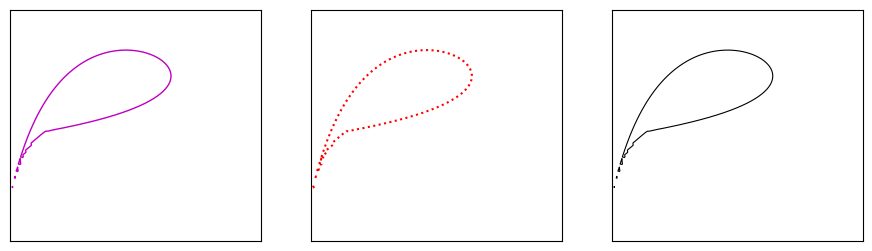

In [3]:

f3,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (11,3), sharex = True, sharey = True)

ax1.contour(GG,AA,w1r[0,:,:],[0.0], colors = 'm', linewidths = 1.)
ax1.contour(GG,AA,w2r[0,:,:],[0.0], colors = 'm', linewidths = 1.)

ax1.contour(GG,AA,w1i[0,:,:],[0.0], colors = 'k', linestyles = '--')
ax1.contour(GG,AA,w2i[0,:,:],[0.0], colors = 'k', linestyles = '--')

ax2.contour(GG,AA,w1r[1,:,:],[0.0], colors = 'r', linestyles = ':')
ax2.contour(GG,AA,w2r[1,:,:],[0.0], colors = 'r', linestyles = ':')

ax2.contour(GG,AA,w1i[1,:,:],[0.0], colors = 'r', linestyles = '--')
ax2.contour(GG,AA,w2i[1,:,:],[0.0], colors = 'r', linestyles = '--')

ax3.contour(GG,AA,w1r[0,:,:],[0.0], colors = 'k', linewidths = 0.8)
ax3.contour(GG,AA,w2r[0,:,:],[0.0], colors = 'k', linewidths = 0.8)

ax3.contour(GG,AA,w1i[0,:,:],[0.0], colors = 'k', linestyles = '--')
ax3.contour(GG,AA,w2i[0,:,:],[0.0], colors = 'k', linestyles = '--')

#plt.xscale('log')
#plt.yscale('log')

#ax1.plot(0,0,'k-', label = 'Linear instability')
#cm = c.ListedColormap(['w','lightgrey'])
#plt.grid(linewidth = 1.5, alpha = 0.1)

plt.axis([0,18,0,1.25])
plt.xticks([]); plt.yticks([])

#ax1.set_xlabel(r'$\alpha_0$'); ax2.set_xlabel(r'$\alpha_0$'); ax3.set_xlabel(r'$\alpha_0$')
#ax1.set_ylabel(r'$\gamma$')

plt.savefig('linear_stability.pdf', transparent = True, bbox_inches='tight')

plt.show()